# Visibility & Observation Planning
We can roughly know, based on the time of year, when a given target might be available.  However, telescope time costs money and we want to get as much data as possible.  We can use the observatory position, twilight times, and target position to determine the optimal times to observe a given target.

## Imports

In [1]:
# Import Numpy & Matplotlib as always

import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
# Import some style support to make prettier plots

from astropy.visualization import astropy_mpl_style, quantity_support
plt.style.use(astropy_mpl_style)
quantity_support()
from matplotlib.ticker import FormatStrFormatter

In [3]:
# Import coordinate packages 

import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, ICRS

## Define Observatory Location & Observation Times

In [4]:
tel = EarthLocation.from_geodetic(lon=-122.153850, lat=37.919340, height=304*u.meter)
tel.name = "Leuschner"

utcoffset = -8 * u.hour # Pacific Standard Time
midnight = Time('2021-02-17 00:00:00') - utcoffset
sunset = Time('2021-02-16 17:48:00') - utcoffset
obsend = Time('2021-02-16 21:15:00') - utcoffset

In [5]:
#target = SkyCoord("01h44m04.08s -15d56m14.9s", frame=ICRS, unit=(u.hourangle, u.deg), obstime='J2000.0')
#target.name = 'Tau Ceti'
target = SkyCoord("08h27m36.78s +45d39m10.8s", frame=ICRS, unit=(u.hourangle, u.deg), obstime='J2000.0')
target.name = 'HD 71148'

## Create Observing Window (to midnight with indicators for obs window)

In [6]:
night_halfwidth = 1 + (midnight - sunset).sec / 3600 # hours

night = np.linspace(0 - night_halfwidth, 0 + night_halfwidth, 100 ) * u.hour

frame_night = AltAz(obstime=midnight+night, location=tel)

In [7]:
# Transform object to alt/az
target_altaz = target.transform_to(frame_night)

# Convert alt/az to airmass (The secant of the zenith angle)
target_airmass = target_altaz.secz

# Plot Visibility

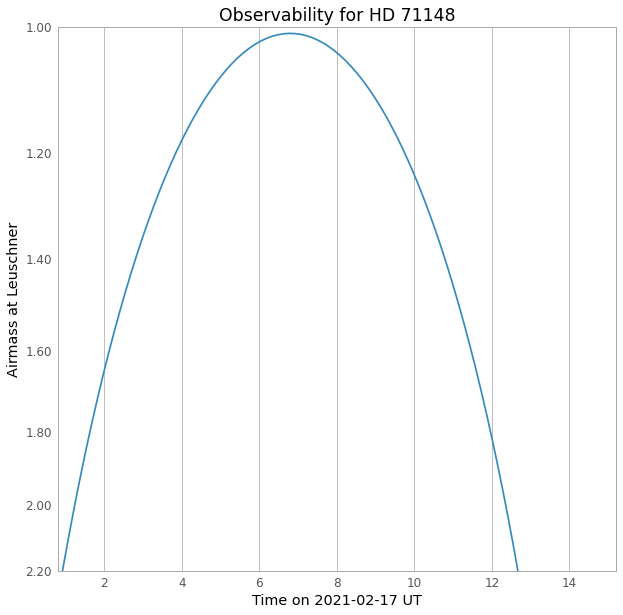

In [8]:
fig, ax = plt.subplots(1,1, figsize=[10,10])

ax.set_xlim(-night_halfwidth-utcoffset.value, night_halfwidth-utcoffset.value)
ax.set_ylim(1,2.2) # airmass

ax.set_xlabel('Time on {} UT'.format(midnight.strftime("%Y-%m-%d")))
ax.set_ylabel('Airmass at {}'.format(tel.name))
ax.set_title('Observability for {}'.format(target.name))

ax.set_yscale('log')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.yaxis.set_minor_formatter(FormatStrFormatter('%.2f'))
ax.invert_yaxis()

line = ax.plot(night-utcoffset,target_airmass)


# Extra Bells & Whistles

In [9]:
from astropy.coordinates import (
    get_sun,
    get_moon
)

In [10]:
moon_night = get_moon(midnight + night)

In [11]:
# look up info for 'fill_between'
# look up info for 'scatter' rather then 'plot'
# use altitude for y axis, and airmass or azimuth for color
# add the moon
# use the sun to find the actual sunset
# exclude airmasses that are nonsensical (i.e. when alt < 0°)
# Show telescope pointing limits for altitude